In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime

In [4]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2012,12,31)

In [23]:
tesla = web.DataReader('TSLA','yahoo',start,end)
ford = web.DataReader('F','yahoo',start,end)
gm = web.DataReader('GM','yahoo',start,end)

In [10]:
car_temp = pd.concat([tesla['Open'],ford['Open'],gm['Open']],axis=1)
car_temp.columns = ['Tesla Open', 'Ford Open', 'GM Open']

In [11]:
car_temp.head()

,Tesla Open,Ford Open,GM Open
Date,,,
2012-01-03,5.788,11.00,20.830000
2012-01-04,5.642,11.15,21.049999
2012-01-05,5.552,11.33,21.100000
2012-01-06,5.440,11.74,22.260000
2012-01-09,5.400,11.83,23.200001


In [8]:
car_comp = pd.concat([tesla,ford,gm],axis=1,keys=['Tesla','Ford','GM'])

In [9]:
car_comp.head()

Tesla                                           Ford         \
             High    Low   Open  Close   Volume Adj Close   High    Low   
Date                                                                      
2012-01-03  5.900  5.530  5.788  5.616  4640500     5.616  11.25  10.99   
2012-01-04  5.734  5.500  5.642  5.542  3150500     5.542  11.53  11.07   
2012-01-05  5.586  5.370  5.552  5.424  5027500     5.424  11.63  11.24   
2012-01-06  5.558  5.282  5.440  5.382  4931500     5.382  11.80  11.52   
2012-01-09  5.498  5.224  5.400  5.450  4485000     5.450  11.95  11.70   

                                                       GM             \
             Open  Close      Volume Adj Close       High        Low   
Date                                                                   
2012-01-03  11.00  11.13  45709900.0  7.544740  21.180000  20.750000   
2012-01-04  11.15  11.30  79725200.0  7.659981  21.370001  20.750000   
2012-01-05  11.33  11.59  67877500.0  7.856563  22.290001  20.959999   
2012-01-06  11.74  11.71  59840700.0  7.937905  23.030001  22.240000   
2012-01-09  11.83  11.80  53981500.0  7.998916  23.430000  22.700001   

                                                       
                 Open      Close    Volume  Adj Close  
Date                                                   
2012-01-03  20.830000  21.049999   9321300  16.269407  
2012-01-04  21.049999  21.150000   7856700  16.346703  
2012-01-05  21.100000  22.170000  17880600  17.135054  
2012-01-06  22.260000  22.920000  18234500  17.714725  
2012-01-09  23.200001  22.840000  12084500  17.652889

In [12]:
car_merge = pd.merge(tesla['Open'],gm['Open'],left_index=True,right_index=True)
car_merge.head()

,Open_x,Open_y
Date,,
2012-01-03,5.788,20.830000
2012-01-04,5.642,21.049999
2012-01-05,5.552,21.100000
2012-01-06,5.440,22.260000
2012-01-09,5.400,23.200001


In [13]:
car_refined = pd.merge(tesla['Open'],gm['Open'],left_index=True,right_index=True,suffixes=('_tesla','_gm'))
car_refined.head()

,Open_tesla,Open_gm
Date,,
2012-01-03,5.788,20.830000
2012-01-04,5.642,21.049999
2012-01-05,5.552,21.100000
2012-01-06,5.440,22.260000
2012-01-09,5.400,23.200001


In [ ]:
tesla = web.DataReader('TSLA','yahoo',datetime.datetime(2017,1,1),datetime.datetime(2019,12,1))
gm = web.DataReader('GM','yahoo',datetime.datetime(2017,1,1),datetime.datetime(2019,12,1))

In [14]:
car_outer = pd.merge(tesla['Open'],gm['Open'],left_index=True,right_index=True,suffixes=('_tesla','_gm'),how = 'outer')
car_outer.head()

,Open_tesla,Open_gm
Date,,
2012-01-03,5.788,20.830000
2012-01-04,5.642,21.049999
2012-01-05,5.552,21.100000
2012-01-06,5.440,22.260000
2012-01-09,5.400,23.200001


In [15]:
car_left = pd.merge(tesla['Open'],gm['Open'],left_index=True,right_index=True,suffixes=('_tesla','_gm'),how = 'left')
car_left.head()

,Open_tesla,Open_gm
Date,,
2012-01-03,5.788,20.830000
2012-01-04,5.642,21.049999
2012-01-05,5.552,21.100000
2012-01-06,5.440,22.260000
2012-01-09,5.400,23.200001


In [16]:
car_right = pd.merge(tesla['Open'],gm['Open'],left_index=True,right_index=True,suffixes=('_tesla','_gm'),how = 'right')
car_right.head()

,Open_tesla,Open_gm
Date,,
2012-01-03,5.788,20.830000
2012-01-04,5.642,21.049999
2012-01-05,5.552,21.100000
2012-01-06,5.440,22.260000
2012-01-09,5.400,23.200001


In [19]:
tesla['Returns'] = tesla['Close'].pct_change(1)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,0.012635


In [21]:
car_temp = car_temp.pct_change(1)
car_temp.head()

,Tesla Open,Ford Open,GM Open
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN
2012-01-05,-0.367608,0.183862,-0.775097
2012-01-06,0.264615,1.241586,22.144490
2012-01-09,-0.635505,-0.788153,-0.231883


In [22]:
car_temp.corr()

,Tesla Open,Ford Open,GM Open
Tesla Open,1.000000,0.031324,0.035750
Ford Open,0.031324,1.000000,0.104704
GM Open,0.035750,0.104704,1.000000


In [24]:
tesla['Company'] = 'Tesla'
ford['Company'] = 'Ford'
gm['Company'] = 'GM'

In [ ]:
info = pd.DataFrame

In [ ]:
car_comp = pd.concat([tesla[['Company','Open']],gm[['Company','Open']],ford[['Company','Open']]])

In [ ]:
car_comp = car_comp.merge(info,how='inner',on='Company')

In [ ]:
car_comp = car_comp.merge(info,how='inner',left_on='Company',right_on='Company')

In [ ]:
tesla['Profit'] = tesla['Close'] - tesla['Close'].shift(1)
tesla['Profitable'] = tesla['Profit']>0
tesla['Month'] = tesla.index

In [ ]:
#incomplete code above

In [46]:
import threading
from queue import Queue
import time

In [47]:
#Lock
print_lock = threading.Lock()

In [48]:
def exampleJob(worker):
    time.sleep(.5)
    with print_lock:                                 #critical section for a single thread to run from start to end
        print(threading.current_thread().name,worker)

In [49]:
def threader():
    while True:
        worker = q.get()
        exampleJob(worker)
        q.task_done()

In [50]:
#Manage queuing of the task
q = Queue()

In [51]:
for x in range(10):
    t = threading.Thread(target=threader)
    t.daemon = True
    t.start()

In [52]:
start = time.time()
for worker in range(20):
    q.put(worker)

In [53]:
q.join()

Thread-33 5
Thread-31 1
Thread-32 2
Thread-28 0
Thread-29 9
Thread-35 7
Thread-34 6
Thread-27 8
Thread-30 3
Thread-26 4
Thread-33 10
Thread-31 11
Thread-32 12
Thread-28 13
Thread-29 14
Thread-35 15
Thread-34 16
Thread-27 17
Thread-30 18
Thread-26 19


In [54]:
print('Entire Job Took:',time.time() - start)

Entire Job Took: 1.3846361637115479


In [ ]:
#Multiprocessing

In [ ]:
#Run from anaconda prompt here it wont execute
#mp1
import multiprocessing

def spawn():
    print('Spawned')
    
if __name__ == '__main__':
    for i in range (5):
        p = multiprocessing.Process(target=spawn)
        p.start()
        p.join()    #more efficient cpu usage is controlled without this cpu usage goes to almost 100%

In [ ]:
#mp5
import multiprocessing

def job(num):
    return num*2
    
if __name__ == '__main__':
    p = Pool(processes=10)
    data = p.map(job,[i for i in range(10)])
    p.close()
    print(data)

In [ ]:
#matplotlib

In [55]:
import matplotlib.pyplot as plt

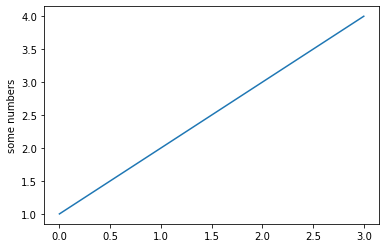

In [56]:
#basic line
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

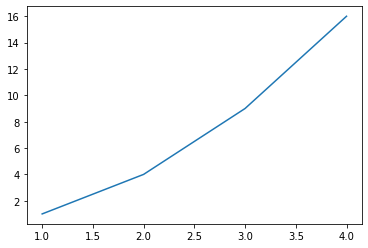

In [57]:
plt.plot([1,2,3,4],[1,4,9,16])

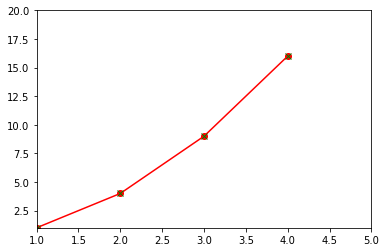

In [58]:
plt.plot([1,2,3,4],[1,4,9,16],color='red',marker='o')
plt.plot([1,2,3,4],[1,4,9,16],'gx')
plt.axis([1,5,1,20])
plt.show()

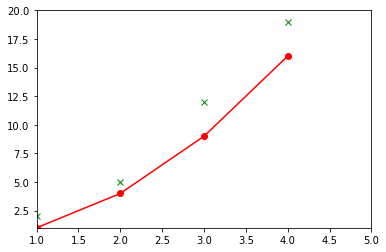

In [61]:
plt.plot([1,2,3,4],[1,4,9,16],color='red',marker='o')
plt.plot([1,2,3,4],[2,5,12,19],'gx')
plt.axis([1,5,1,20])
plt.show()

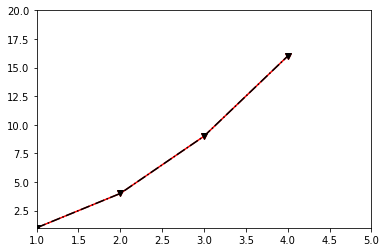

In [67]:
plt.plot([1,2,3,4],[1,4,9,16],color='red',marker='v')
plt.plot([1,2,3,4],[1,4,9,16],'-.vk')
plt.axis([1,5,1,20])
plt.show()

In [ ]:
#dotplot

In [ ]:
#incomplete
t = np.arange()

In [ ]:
#scatter

In [ ]:
#incomplete
data = {'a' : np.arange(50),
        'c' : np.random.randint()}

In [ ]:
#bar

In [68]:
height = [3,12,5,18,45]
bars = ('A','B','C','D','E')
y_pos = np.arange(len(bars))

([<matplotlib.axis.XTick at 0x29e0b128820>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E')])

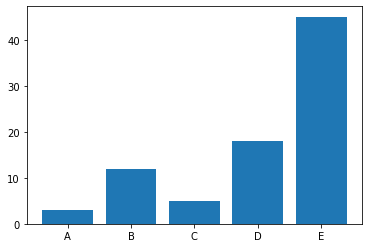

In [69]:
plt.bar(y_pos,height)
plt.xticks(y_pos,bars)

In [ ]:
#stacked bar

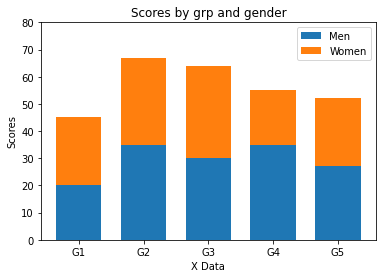

In [75]:
menavg = [20,35,30,35,27]
N = len(menavg)
womenavg = [25,32,34,20,25]
ind = np.arange(N)
width = 0.7
p1 = plt.bar(ind,menavg,width)
#p2 = plt.bar(ind,womenavg,width)
p2 = plt.bar(ind,womenavg,width,bottom=menavg)
plt.ylabel('Scores')
plt.xlabel('X Data')
plt.title('Scores by grp and gender')
plt.xticks(ind,('G1','G2','G3','G4','G5'))
plt.yticks(np.arange(0,81,10))
plt.legend((p1[0],p2[0]),('Men','Women'))
plt.show()

In [ ]:
#bar joint

In [76]:
labels = ['G1','G2','G3','G4','G5']
menavg = [20,35,30,35,27]
womenavg = [25,32,34,20,25]

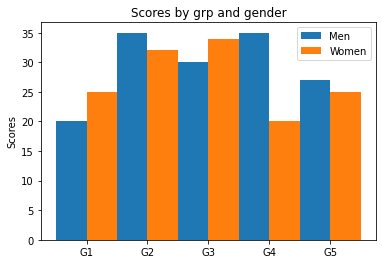

In [79]:
#recommended syntax use fig and then axes
x = np.arange(len(labels))
width = 0.5
fig,ax = plt.subplots()
rects1 = ax.bar(x-width/2,menavg,width,label='Men')
rects2 = ax.bar(x+width/2,womenavg,width,label='Women')
ax.set_ylabel('Scores')
ax.set_title('Scores by grp and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

<BarContainer object of 3 artists>

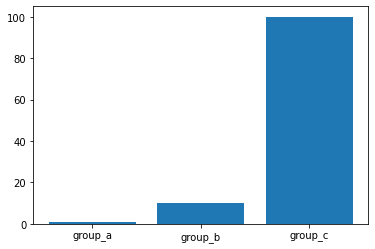

In [80]:
names = ['group_a','group_b','group_c']
values = [1,10,100]
plt.bar(names,values)

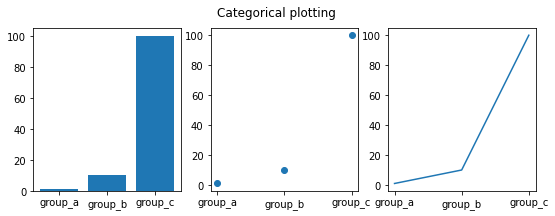

In [81]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.bar(names,values)
plt.subplot(132)
plt.scatter(names,values)
plt.subplot(133)
plt.plot(names,values)
plt.suptitle('Categorical plotting')
plt.show()

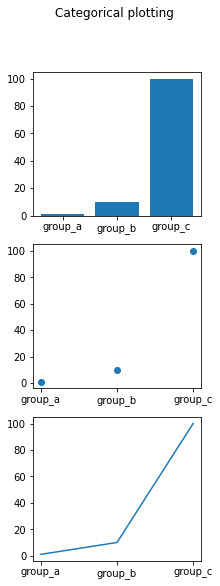

In [83]:
plt.figure(figsize=(3,9))
plt.subplot(311)
plt.bar(names,values)
plt.subplot(312)
plt.scatter(names,values)
plt.subplot(313)
plt.plot(names,values)
plt.suptitle('Categorical plotting')
plt.show()

In [84]:
plt.savefig('chart.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
#pie chart

In [91]:
labels = 'Frogs','Hogs','Dogs','Logs'
sizes = [15,30,45,10]
explode = (0,0.5,0,0)

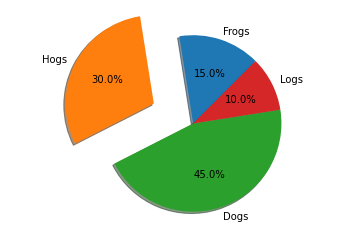

In [92]:
#explode is used for highlighting on specific attributes
fig,ax = plt.subplots()
ax.pie(sizes,explode,labels,autopct='%1.1f%%',shadow=True,startangle=45)
ax.axis('equal')
plt.show()

In [ ]:
#boxplot

In [93]:
np.random.seed(10)
data1 = np.random.normal(100,10,200)
data2 = np.random.normal(80,30,200)
data3 = np.random.normal(90,20,200)
data4 = np.random.normal(70,25,200)

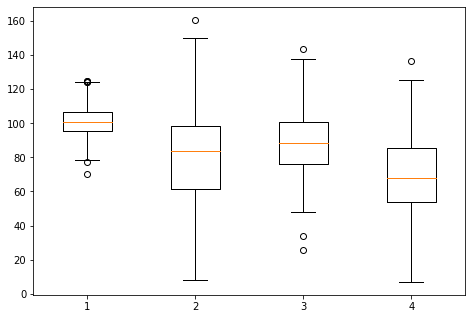

In [94]:
data = [data1,data2,data3,data4]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(data)
plt.show()

In [ ]:
#Explore plotly|Dash as an alternative to tableau for visualizations in projects,internship

In [ ]:
#Violin

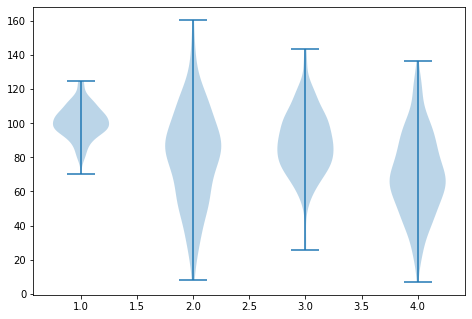

In [95]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(data)
plt.show()

In [ ]:
#heat map

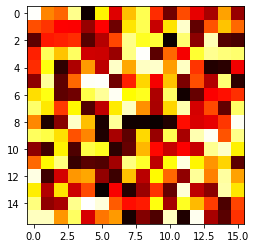

In [96]:
a = np.random.random((16,16))
plt.imshow(a,cmap='hot',interpolation='nearest')
plt.show()

Text(0.5, 1.0, 'A single plot')

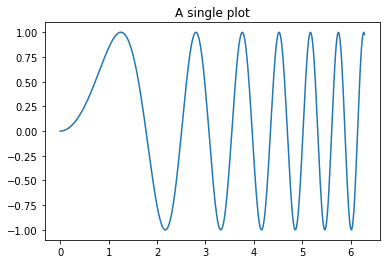

In [97]:
x = np.linspace(0,2*np.pi,400)
y = np.sin(x**2)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('A single plot')

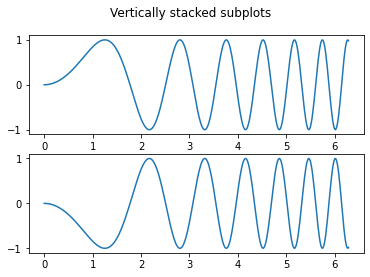

In [98]:
fig,axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x,y)
axs[1].plot(x,-y)

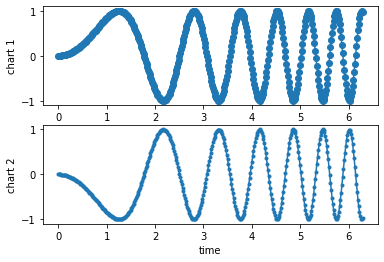

In [99]:
plt.subplot(2,1,1)
plt.plot(x,y,'o-')
plt.ylabel('chart 1')

plt.subplot(2,1,2)
plt.plot(x,-y,'.-')
plt.xlabel('time')
plt.ylabel('chart 2')

plt.show()

Text(0.5, 1.0, 'Axis 4')

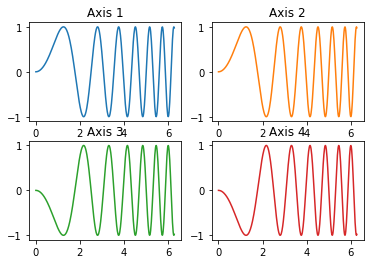

In [103]:
fig,axs = plt.subplots(2,2)
axs[0,0].plot(x,y)
axs[0,0].set_title('Axis 1')
axs[0,1].plot(x,y,'tab:orange')
axs[0,1].set_title('Axis 2')
axs[1,0].plot(x,-y,'tab:green')
axs[1,0].set_title('Axis 3')
axs[1,1].plot(x,-y,'tab:red')
axs[1,1].set_title('Axis 4')

In [104]:
for ax in axs.flat:
    ax.set(xlabel='x-label',ylabel='y-label')

In [105]:
for ax in axs.flat:
    ax.label_outer()

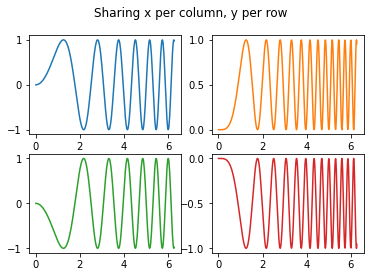

In [107]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x,y)
ax2.plot(x,y**2,'tab:orange')
ax3.plot(x,-y,'tab:green')
ax4.plot(x,-y**2,'tab:red')

In [108]:
for ax in fig.get_axes():
    ax.label_outer()